# Байесовская статистика
## Задание BS.6


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

* Задача 1 —  100 баллов

---

In [6]:
# Bot check

# HW_ID: ds_bs6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from math import gamma as Г  # переполнялось
from scipy.special import loggamma

---
### Задача 1.

<font color="red"><b></b></font>

Рассмотрим некоторую реализацию дерева Поля при следующих предположениях и ограничениях.
* Дерево ограничено глубиной `tree_depth`. 
* Множество элементарных исходов $\mathrm{\Omega} = B = [a, b]$ также ограничено. 
* Пусть на каждом уровне деление текущего множества $B_\varepsilon$ происходит пополам. 

Тогда для описания всех множеств $\{B_\varepsilon\}$ достаточно задать 
* "центр" `tree_center`$=с=\frac{a+b}{2}$ множества $B$ 
* и его размах `tree_range`$=\delta$,

В таком случае верхнее множество представимо в виде $B=[c-\delta/2, c+\delta/2]$. Каждое отдельное множество $B_\varepsilon$ имеет длину $|B_\varepsilon| = \delta / 2^{|\varepsilon|}$, причём если для любых двух путей $\varepsilon_0, \varepsilon_1$ выполнено $|\varepsilon_0| = |\varepsilon_1|$, то $|B_{\varepsilon_0}| = |B_{\varepsilon_1}|$, то есть отрезки одного уровня имеют одинаковую длину.

В такой реализации нужно тщательно выбирать множество $B$: оно должно почти полностью покрывать область высокой плотности. Для этого можно или предварительно сдвинуть дерево, основываясь на предэкспериментальных данных, или выбрать большой размах `tree_range`. Второй способ, однако, может потребовать большой глубины дерева для получения корректных результатов.

Выбор априорных значений уже написан за вас в функции `_get_alphas`. Обоснование этого выбора можно найти в <a href="https://arxiv.org/pdf/0910.5060.pdf">оригинальной статье</a>. Допишите реализацию класса.

In [8]:
class PolyaTree:
    def __init__(self, tree_depth=20, tree_range=8, tree_center=0):
        '''
        :param tree_depth: максимально возможная глубина дерева
        :param tree_range, tree_center: задают стартовое множество B=[-tree_range/2 + tree_center, tree_range/2 + tree_center]
        '''
        self.tree_depth, self.tree_range, self.tree_center = tree_depth, tree_range, tree_center
        self.buckets = self._get_buckets()
        self.alphas_0_prior, self.alphas_1_prior = self._get_alphas()
        self.alphas_0, self.alphas_1 = self.alphas_0_prior, self.alphas_1_prior

    def test_equality(self, sample_1, sample_2):
        '''Проверяет гипотезу о равенстве распределений двух выборок. НЕ изменяет self.alphas_0 и self.alphas_1
        :param sample_1, sample_2: выборки для тестирования
        :return: байесовский фактор в пользу H0: P_1 = P_2
        '''
        L1, R1, L2, R2 = [*self._drop_sample(sample_1), *self._drop_sample(sample_2)]
        return sum([
            loggamma(self.alphas_0_prior[i] + L1[i] + L2[i]) + loggamma(self.alphas_1_prior[i] + R1[i] + R2[i]) -
            loggamma(self.alphas_0_prior[i] + self.alphas_1_prior[i] + L1[i] + R1[i] + L2[i] + R2[i]) - 
            loggamma(self.alphas_0_prior[i] + L1[i]) + loggamma(self.alphas_1_prior[i] + R1[i]) - 
            loggamma(self.alphas_0_prior[i] + L2[i]) + loggamma(self.alphas_1_prior[i] + R2[i]) + 
            loggamma(self.alphas_0_prior[i] + self.alphas_1_prior[i] + L1[i] + R1[i]) + 
            loggamma(self.alphas_0_prior[i] + self.alphas_1_prior[i] + L2[i] + R2[i])
            for i in range(self.tree_depth)])
    
    def _get_alpha(self, level, c=1):
        '''Расчитывает априорные параметры на каждом уровне дерева
        :param level: текущая глубина, c: константа
        :return: априорные параметры для заданной глубины
        '''
        return c * (level ** 2)

    def _get_alphas(self):
        '''Генерирует априорные параметры для всего дерева.
        На каждом уровне априорный параметр определятся как cm^2 согласно статье. 
        На выходе отдает два массива, параметры self.alphas_0_prior[i] и self.alphas_1_prior[i] для всех theta. 
        В массиве соответствие узлам сверху-вниз и слева направо.
        :return: априорные параметры
        '''
        level, repetitions, alphas_0, alphas_1 = 1, 1, [], []
        while level <= self.tree_depth:
            alpha = [self._get_alpha(level)] * repetitions
            alphas_0.extend(alpha)
            alphas_1.extend(alpha)
            level += 1
            repetitions <<= 1
        return np.array(alphas_0), np.array(alphas_1)

    def _drop_sample(self, sample):
        '''Выполняет "спуск" выборки по дереву
        :param sample: выборка
        :return: число элементов, которые "пошли" налево и направо на каждом из делений
        '''
        L, R = [], []
        for lvl in range(self.tree_depth):
            L.append((sample < (self.tree_center - self.tree_range / 2**(lvl+1))).sum())
            R.append(len(sample) - L[-1])
        return np.array(L), np.array(R)

    def _get_buckets(self):
        ''' Создает бакеты B_e, |e| <= tree_depth, описывающие дерево, по правиалам:
        1) B = [c - delta/2; c + delta/2] -- наше ограничение
        2) B_e0 + B_e1 = B_e и они не пересекаются -- определение дерева
        3) |B_e| = delta / 2^{|e|} -- наше ограничение, деление множества происходит пополам
        '''        
        bs = [[self.tree_center - self.tree_range/2, self.tree_center + self.tree_range/2]]
        for _ in range(1, self.tree_depth + 1):
            new = []
            for b in bs:
                mid = (b[0]+b[1]) / 2
                new.append([b[0], mid])
                new.append([mid, b[1]])
            bs = new
        return bs

Исследуйте сходимость метода относительно апостериорных характеристик при различных выбранных параметрах. Рассмотрите, как влияют:
- размер выборки;
- верность гипотезы;
- выбор множества $B$;
- сравниваемые истинные распределения;
- глубина дерева.

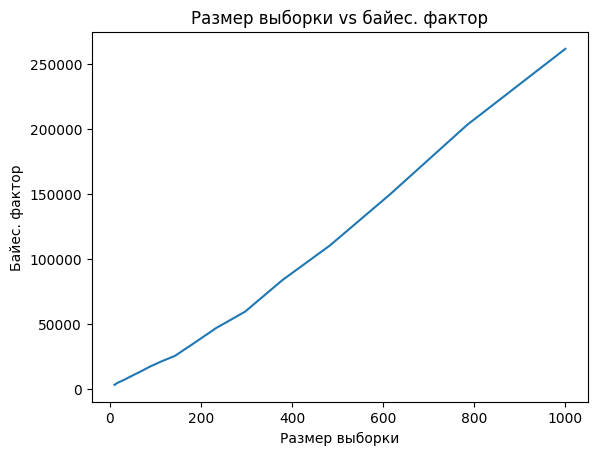

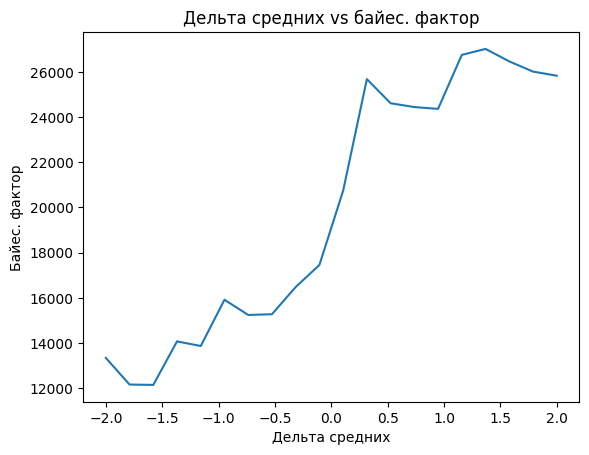

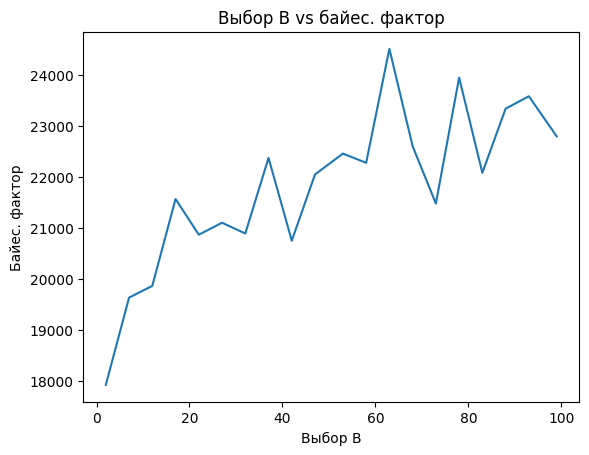

MemoryError: 

In [9]:
def run_experiment(n=100, mean1=0, std1=1, mean2=0, std2=1, tree_depth=20, tree_range=8, tree_center=0):
    sample1, sample2 = sps.norm(mean1,std1).rvs(n), sps.norm(mean2,std2).rvs(n)
    return PolyaTree(tree_depth,tree_range,tree_center).test_equality(sample1,sample2)

for arr, key, x in zip(
    [np.logspace(1,3,20).astype(int), np.linspace(-2,2,20), np.linspace(2,99,20).astype(int), np.linspace(1,40,20).astype(int)],
    ['n',                             'mean1',              'tree_range',                     'tree_depth'                    ],
    ['Размер выборки',                'Дельта средних',     'Выбор B',                        'Глубина дерева'                ]):
    plt.plot(arr, [run_experiment(**{key:v}) for v in arr])
    plt.xlabel(x)
    plt.ylabel('Байес. фактор')
    plt.title(f'{x} vs байес. фактор')
    plt.show()

Сделайте выводы

*На всех графиках видна сильная корреляция (даже прямая пропорциональность, если бы не шум)*